In [90]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score, silhouette_score

## Lectura de datos 

In [91]:
df=pd.read_csv("data/clean.csv")

In [92]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [94]:
#Caracteristicas de Interes
features=['Age','DailyRate','DistanceFromHome','Education','StandardHours','TotalWorkingYears']
df_clusters=df[features]
X=df[features]

#Estandarizacion
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)


In [95]:
print(df_clusters)

      Age  DailyRate  DistanceFromHome  Education  StandardHours  \
0      41       1102                 1          2             80   
1      49        279                 8          1             80   
2      37       1373                 2          2             80   
3      33       1392                 3          4             80   
4      27        591                 2          1             80   
...   ...        ...               ...        ...            ...   
1465   36        884                23          2             80   
1466   39        613                 6          1             80   
1467   27        155                 4          3             80   
1468   49       1023                 2          3             80   
1469   34        628                 8          3             80   

      TotalWorkingYears  
0                     8  
1                    10  
2                     7  
3                     8  
4                     6  
...                 ...  
1

In [96]:
#Calculo de sse para clusters del 1 al 11
sse=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

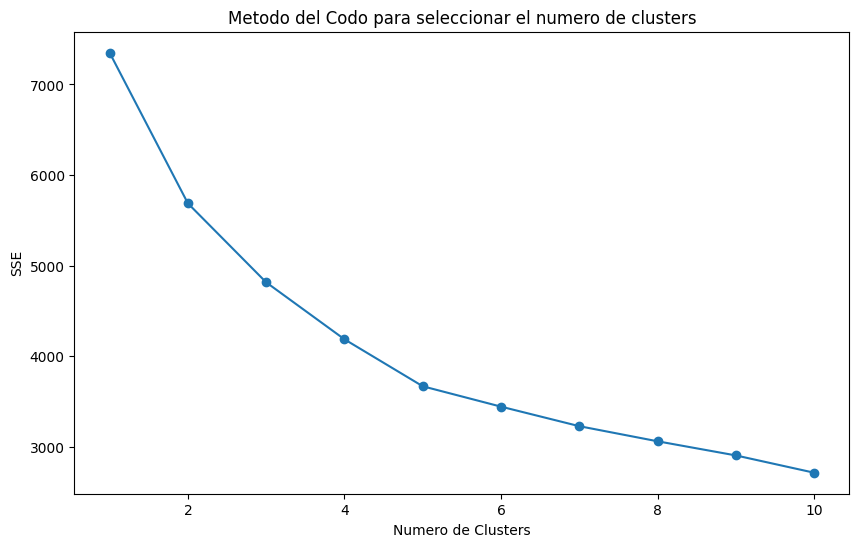

In [97]:
#Grafica de codo
plt.figure(figsize=(10,6))
plt.plot(range(1,11),sse,marker='o')
plt.xlabel('Numero de Clusters')
plt.ylabel('SSE')
plt.title('Metodo del Codo para seleccionar el numero de clusters')
plt.show()

In [98]:
#Generando el modelo
kmeans=KMeans(n_clusters=5,random_state=0)
df_clusters.loc[:,'cluster']=kmeans.fit_predict(X_scaled)

C:\Users\raule\AppData\Local\Temp\ipykernel_1968\899848773.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clusters.loc[:,'cluster']=kmeans.fit_predict(X_scaled)


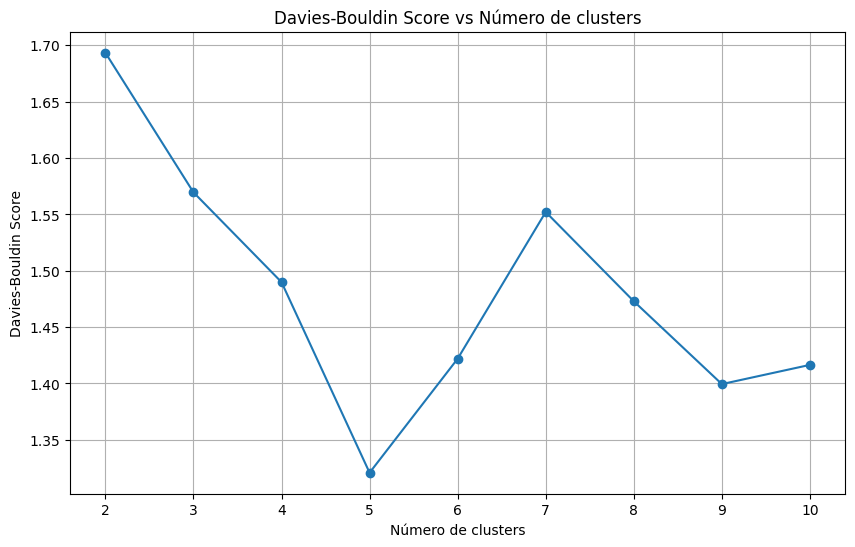

In [99]:
# Usando tus variables ya existentes
scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X_scaled)
    score = davies_bouldin_score(X_scaled, labels)
    scores.append(score)

# Visualizar resultados
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), scores, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Davies-Bouldin Score')
plt.title('Davies-Bouldin Score vs Número de clusters')
plt.grid(True)
plt.show()

In [100]:
#Resumen de los clusters
cluster_summary=df_clusters.groupby('cluster').mean()
print(cluster_summary)

               Age    DailyRate  DistanceFromHome  Education  StandardHours  \
cluster                                                                       
0        49.643678   831.923372          7.436782   3.137931           80.0   
1        31.294737   898.410526          6.666667   1.508772           80.0   
2        34.988235   398.094118          5.897059   3.305882           80.0   
3        36.468992   783.011628         22.732558   2.972868           80.0   
4        34.039877  1132.226994          5.527607   3.503067           80.0   

         TotalWorkingYears  
cluster                     
0                23.873563  
1                 7.203509  
2                 8.644118  
3                10.089147  
4                 8.450920  


In [101]:
df_clusters.loc[:,'Attrition']=df['Attrition']
print(df_clusters['Attrition'].value_counts())


Attrition
No     1233
Yes     237
Name: count, dtype: int64


C:\Users\raule\AppData\Local\Temp\ipykernel_1968\2030350165.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clusters.loc[:,'Attrition']=df['Attrition']


In [102]:
df_attrition=df_clusters[df_clusters['Attrition']=='Yes']
df_attrition

,Age,DailyRate,DistanceFromHome,Education,StandardHours,TotalWorkingYears,cluster,Attrition
0,41,1102,1,2,80,8,1,Yes
2,37,1373,2,2,80,7,1,Yes
14,28,103,24,3,80,6,3,Yes
21,36,1218,9,4,80,10,4,Yes
24,34,699,6,1,80,8,1,Yes
...,...,...,...,...,...,...,...,...
1438,23,638,9,3,80,1,2,Yes
1442,29,1092,1,4,80,4,4,Yes
1444,56,310,7,2,80,14,0,Yes
1452,50,878,1,4,80,12,0,Yes


In [103]:
# Observaciones para el attrition (Yes/No) en cada cluster

# Crear un nuevo DataFrame que agrupe por cluster y cuente los casos de Attrition = Yes
conteo_por_cluster = df_attrition.groupby('cluster').agg(
    Attrition_Yes_Count=('Attrition', lambda x: (x == 'Yes').sum())  # Cuenta los casos donde Attrition = 'Yes'
)

# Calcular el total de empleados en todo el DataFrame
total_empleados = len(df_attrition)

# Añadir el total de empleados a cada fila del DataFrame
conteo_por_cluster['Total_Empleados_con_Attrition'] = total_empleados

# Calcular el porcentaje de empleados que dejaron la empresa en cada cluster
conteo_por_cluster['Attrition_Percentage'] = (conteo_por_cluster['Attrition_Yes_Count'] / total_empleados) * 100

# Mostrar el resumen
print(conteo_por_cluster)



         Attrition_Yes_Count  Total_Empleados_con_Attrition  \
cluster                                                       
0                         24                            237   
1                         49                            237   
2                         61                            237   
3                         54                            237   
4                         49                            237   

         Attrition_Percentage  
cluster                        
0                   10.126582  
1                   20.675105  
2                   25.738397  
3                   22.784810  
4                   20.675105  
